# Introduction to Seaborn (visualization with Seaborn)

#### What is Seaborn ? 

Seaborn is a data visualization library in Python that provides a high-level interface for creating attractive and informative statistical graphics. It is built on top of Matplotlib and integrates closely with Pandas data structures.

Seaborn aims to make complex data visualization easier and more intuitive for data analysts and scientists. It provides a wide range of built-in themes, color palettes, and plot types to help users create visually appealing and informative plots.

Key features of Seaborn include:

1. Easy-to-use data structures and functions for creating attractive and informative plots.

2. High-level interface for creating complex plots with customizable styles and settings.

3. Integration with Pandas data structures for handling and manipulating data efficiently.

4. Built-in themes and color palettes to make your plots visually appealing and easy to understand.

5. Support for both static and interactive plots.   
---

## Importing Important Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## set_style()

Seaborn provides various themes and styles for creating plots. You can use the `set_style()` function to set the theme of your plots. The available themes include:

- 'darkgrid'
- 'whitegrid'
- 'dark'
- 'white'
- 'ticks'

You can set the theme using the `set_style()` function before creating your plots. For example:





## Random Data

In [307]:
x = [10,20,30,40,50,60]
y = [20,40,60,80,100,120]

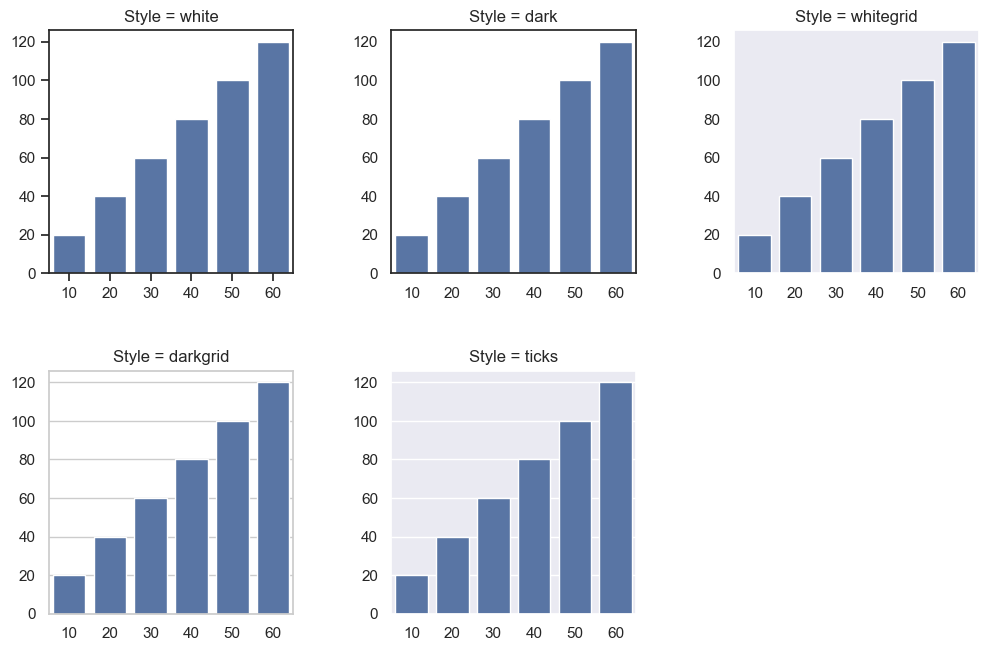

In [325]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
sns.set_style('white')
sns.barplot(x=x, y=y)
plt.title("Style = white")

plt.subplot(3, 3, 2)
sns.set_style('dark')
sns.barplot(x=x, y=y)
plt.title("Style = dark")

plt.subplot(3, 3, 3)
sns.set_style('whitegrid')
sns.barplot(x=x, y=y)
plt.title("Style = whitegrid")

plt.subplot(3, 3, 4)
sns.set_style('darkgrid')
sns.barplot(x=x, y=y)
plt.title("Style = darkgrid")

plt.subplot(3, 3, 5)
sns.set_style('ticks')
sns.barplot(x=x, y=y)
plt.title("Style = ticks")

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

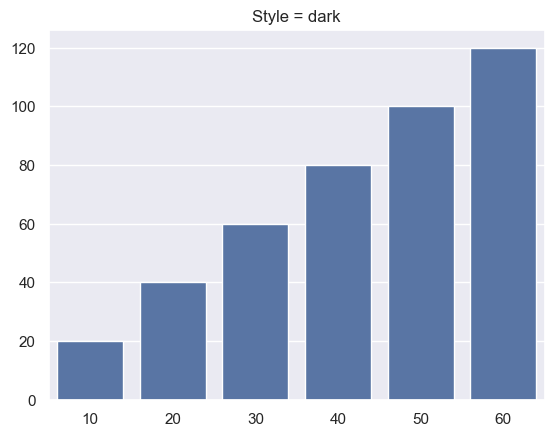

----

## Importing Dataset

In [135]:
data = sns.load_dataset('titanic')

---

## Exploring Dataset

### Columns in Dataset

In [136]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### Datatypes of columns 

In [137]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

### First 5 Rows

In [138]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Checking for Missing Values

In [139]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

---

## Cleaning Dataset

### Dropping 'deck' Column

In [141]:
data.drop('deck',axis = 1 , inplace = True)

### Now Checking for Missing Values

In [142]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

### Filling age column with mean age

In [143]:
data['age'] = data['age'].fillna(data['age'].mean())

### Now Checking for Missing Values Again

In [144]:


data.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

### Dropping All Missing Values

In [145]:
data.dropna(axis=0,inplace=True)

data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

---

## Data Analysis

---

## 1. Scatter Plot

#### What is scatter plot ? 

A scatter plot is a type of graph that displays the relationship between two numerical variables. It is used to visualize the correlation between the variables and to identify any patterns or trends in the data.

### Parameters

- x - The x-axis variable.

- y - The y-axis variable.

- hue - The categorical variable to use for coloring the points.

- style - The categorical variable to use for changing the style of the points.

- marker - The marker style for the points.

- alpha - The transparency of the points, Default (0.5).

- s - The size of the points, Default (200).

- hue_order - The order of the categories in hue.


### Plotting

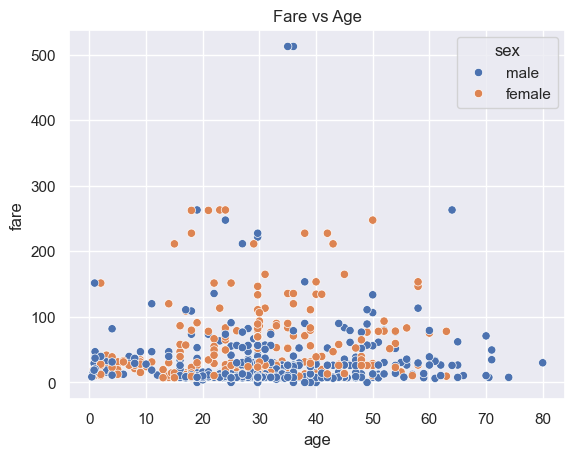

In [247]:


sns.scatterplot(x = 'age', y = 'fare', hue ='sex', data=data)

plt.title('Fare vs Age')

plt.show()

### Interpretation

As we can see from scatter plot , most of the passengers paid high fare and were older. Most of the passengers were male.

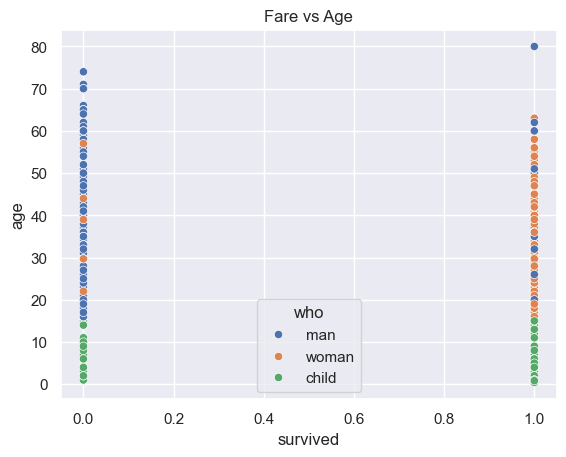

In [252]:


sns.scatterplot(x = 'survived', y = 'age', hue ='who', data=data)

plt.title('Survived vs Age and who')

plt.show()


### Interpretation 

As we can see from scatter plot , most of the women and child were survived

### Customized Scatter Plot

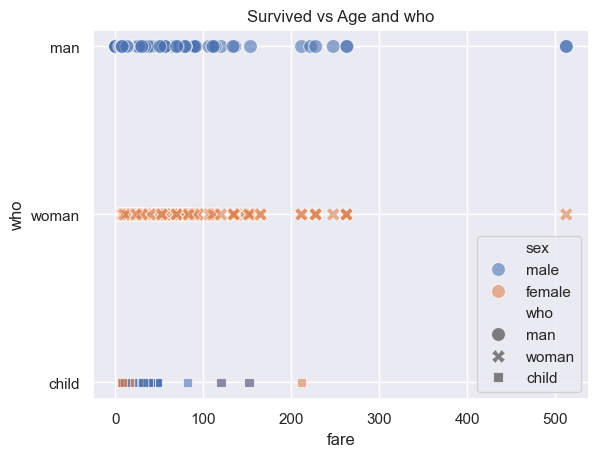

In [265]:


sns.scatterplot(x = 'fare', y = 'who', hue ='sex', data=data, s=100,style='who',alpha = 0.6)

plt.title('Survived vs Age and who')

plt.show()




---

## 2. Line Plot


### Parameter

- x - The x-axis variable.

- y - The y-axis variable.

- hue - The categorical variable to use for coloring the bar

- style - The categorical variable to use for changing the style of the bars

- lw - Changes the width of line


### Plotting

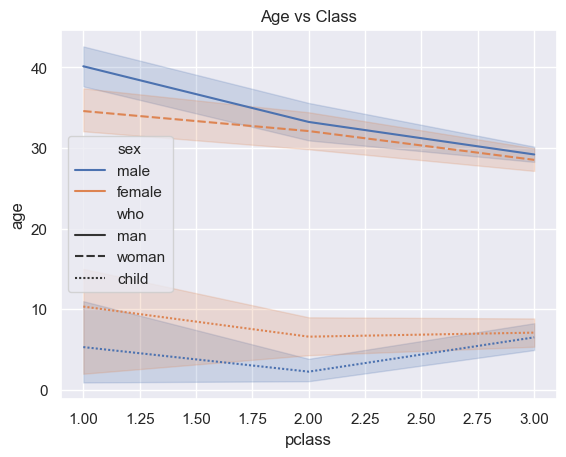

In [267]:

sns.lineplot(x = 'pclass', y = 'age',data=data,hue = 'sex' , style = 'who')

plt.title('Age vs Class')

plt.show()

### Interpretation 

As we can see from line plot , passengers of first class paid more fare and were older. Passengers of second and third class paid less fare and were younger.



---

## 3. Bar Plot


#### What is Bar Plot ? 

A bar plot is a type of graph that displays the relationship between a categorical variable and a numerical variable. It is used to compare the values of the numerical variable across different categories of the categorical variable.

### Parameters

- ci - Class Interval, Default (95 % Confidence Interval), None (Remove CI) 

- estimator - Function to estimate statistic, Default (np.mean),np.max ,np.min ,np.sum ,etc

- hue - use to plot categorical data 

- order - use for specifying the order of the categories

- hue_order - use for specifying the order of the categories in hue

- color - use for specifying the color of bars

- edgecolor - use for specifying the edge color of bars

- lw - use for specifying the line width of the bars

- palette - use for specifying the color palette of bars

- saturation - use for controlling the saturation of the colors

- errwidth - use for controlling the width of error bars


### Vertical Bar Plot

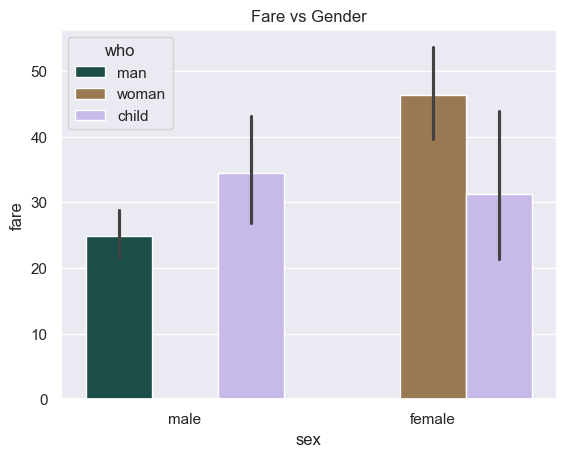

In [166]:

sns.barplot(x = 'sex', y = 'fare',data = data,hue = 'who',palette='cubehelix',saturation=0.8,estimator=np.mean)


plt.title('Fare vs Gender')

plt.show()


### Horizontal Bar Plot

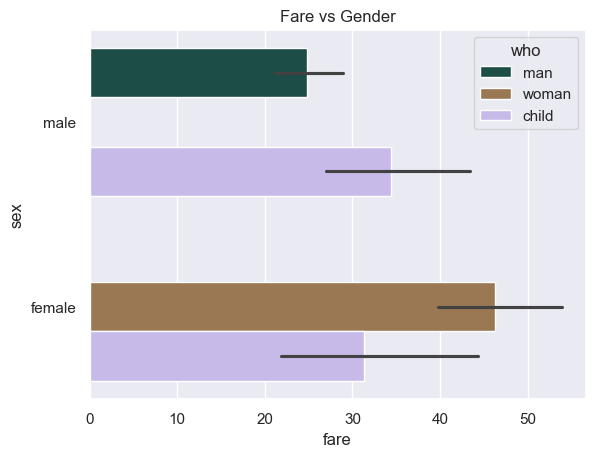

In [165]:

sns.barplot(x = 'fare', y = 'sex',data = data,hue = 'who',palette='cubehelix',saturation=0.8,estimator=np.mean)


plt.title('Fare vs Gender')

plt.show()


### Customized Bar Plot

C:\Users\Syed Abdullah\AppData\Local\Temp\ipykernel_2364\2422907591.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'sex', y = 'fare',data = data,hue = 'who',palette= 'dark:mintcream',ci=None ,edgecolor = 'purple',lw = 5)


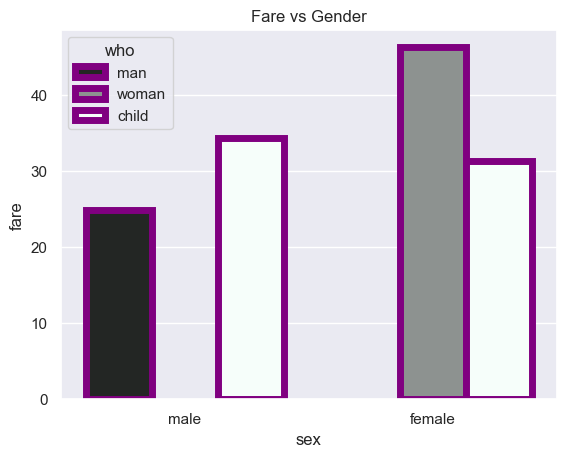

In [174]:

sns.barplot(x = 'sex', y = 'fare',data = data,hue = 'who',palette= 'dark:mintcream',ci=None ,edgecolor = 'purple',lw = 5)

plt.title('Fare vs Gender')

plt.show()


### Interpretation

The Bar Plot shows that the more fare collected from women. In children , more fare collected from boys. 

---

## Count Plot

#### What is Count Plot ? 

A count plot is a type of graph that displays the number of observations for each category of a categorical variable. It is used to visualize the distribution of the categorical variable.

### Parameters

- order - use for specifying the order of the categories

- hue - use to plot categorical data 

- hue_order - use for specifying the order of the categories in hue

- color - use for specifying the color of bars

- edgecolor - use for specifying the edge color of bars

- lw - use for specifying the line width of the bars

- palette - use for specifying the color palette of bars

- saturation - use for controlling the saturation of the colors

- hatch - use to give pattern to plot



### Plotting

### Vertical Plot

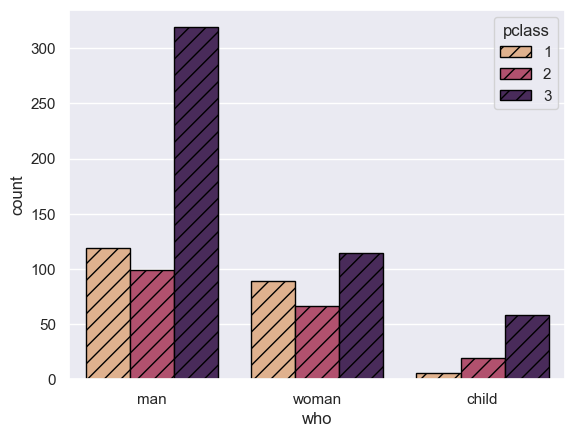

In [201]:

sns.countplot(x = 'who',data = data,hue = 'pclass',palette='flare',hatch = '//',edgecolor = "black")
plt.show()

### Horizontal Plot

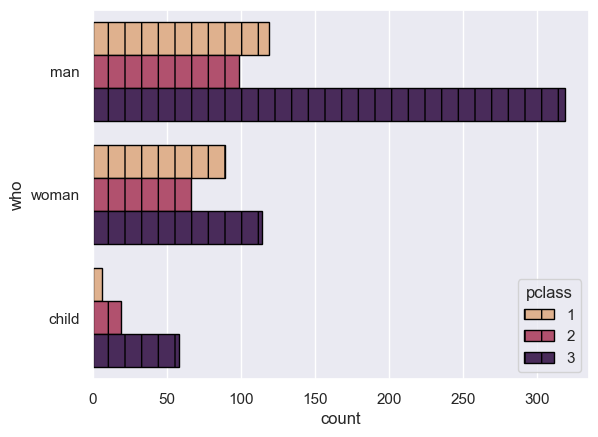

In [207]:

sns.countplot(y = 'who',data = data,hue = 'pclass',palette='flare',hatch = '|',edgecolor = "black")
plt.show()

### Interpretation

The Count Plot shows that more passengers from the 3rd class. And More Male were in 1st Class

---

## 4. Box Plot


#### What is Box Plot ?

A box plot is a type of graph that displays the distribution of a numerical variable by visualizing the quartiles and outliers. It is used to detect and identify the spread, skewness, and outliers in the data.



### Parameters

- x - use for specifying the x-axis variable

- y - use for specifying the y-axis variable

- hue - use to plot categorical data

- hue_order - use for specifying the order of the categories in hue

- color - use for specifying the color of boxes

- saturation - use for controlling the saturation of the colors

- width - use for specifying the width of boxes

- linewidth - use for specifying the linewidth of boxes

- fliersize - use for specifying the size of outliers

- flierprops - use for specifying the properties of outliers

- whis - use for specifying the range of values to include in the whiskers

- notch - use to create notched boxes



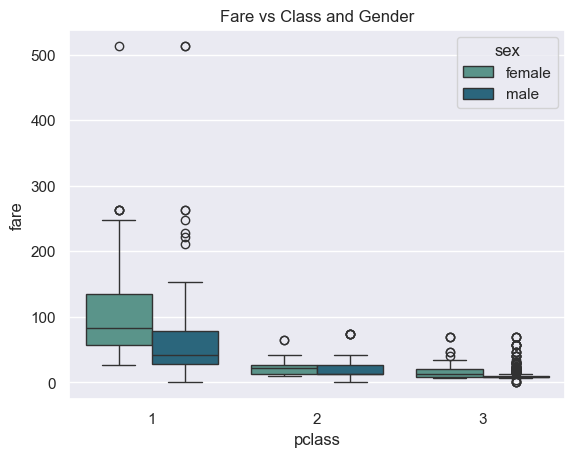

In [226]:

sns.boxplot(x = 'pclass' , y = 'fare', hue = 'sex' ,data= data ,palette='crest')

plt.title('Fare vs Class and Gender')

plt.show()

### Notched Box Plot

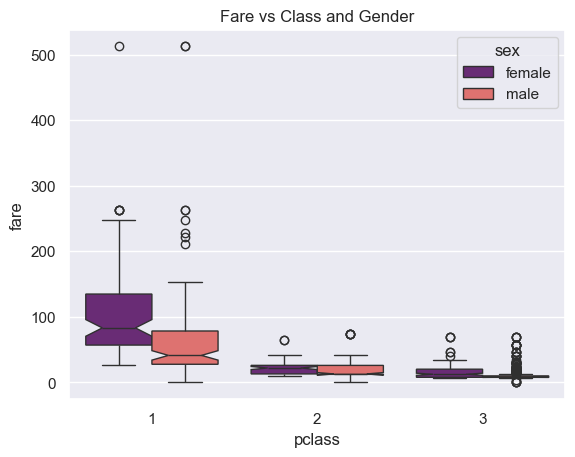

In [228]:

sns.boxplot(x = 'pclass' , y = 'fare', hue = 'sex' ,data= data ,palette='magma',notch = True)

plt.title('Fare vs Class and Gender')

plt.show()

### Customized Box Plot

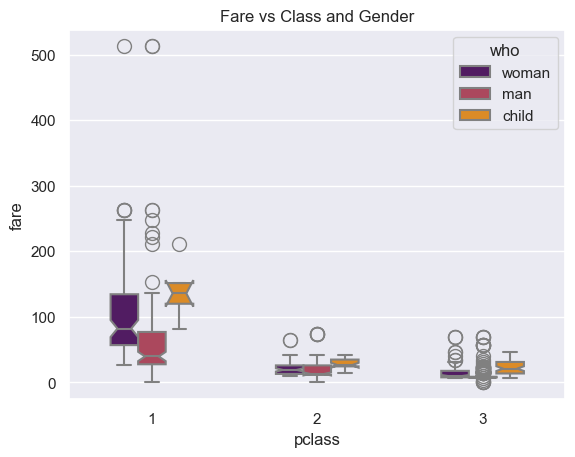

In [245]:

sns.boxplot(x = 'pclass' , y = 'fare', hue = 'who' ,data= data ,palette='inferno',notch = True , fliersize=10 ,width=0.5,linewidth=1.5,linecolor='grey')

plt.title('Fare vs Class and Gender')

plt.show()

## Some Extra Plotting

## Heat Map

#### What is heatmap ?

A heatmap is a graphical representation of data where the individual values in a matrix are represented as colors. It is used to visualize the relationship between two variables and their potential correlation.

### Parameters

- data - 2D array-like or pandas DataFrame, containing the data to be plotted

- cmap - Changings the heatmap color 

- vmin - minimum value of the heatmap color

- vmax - maximum value of the heatmap color

- annot - Whether to annotate the heatmap with the values

- fmt - formatting string for annot

- linewidth - linewidth of the heatmap

- linecolor - linecolor of the heatmap





### Simple Example

In [272]:
pclasscount = data.groupby('pclass')['who'].value_counts().unstack()

### Plotting

<Axes: xlabel='who', ylabel='pclass'>

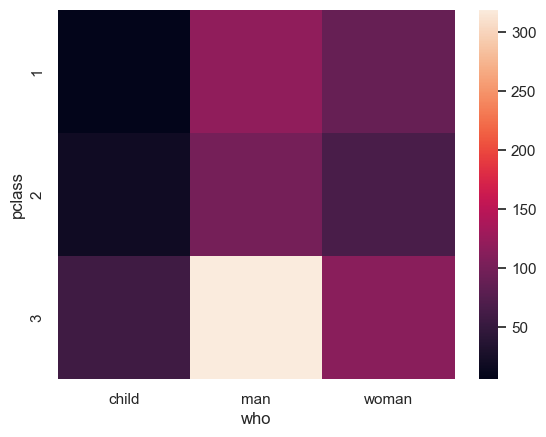

In [273]:
sns.heatmap(data=pclasscount)

### Interpretation

The Heat Map shows that most passengers from the 3rd class were men.



### Correlation Example

<Axes: >

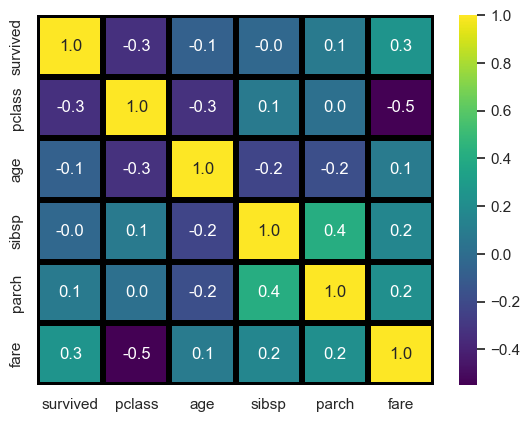

In [282]:
### Seperating Numeric Data

numericData = data.select_dtypes ('number')

sns.heatmap(data=numericData.corr() , cmap = 'viridis', annot= True , fmt = '.1f' , linewidths= 3 , linecolor= 'black')

## Pair Plot

#### What is the pair plot ?

A pair plot is a type of data visualization that plots pairwise relationships between variables in a dataset. It is useful for exploring the relationship between variables and identifying potential patterns or correlations.

### Parameters

- data - DataFrame containing the data to be plotted

- hue - Categorical variable to use for coloring the plot

- palette - Color palette to use for coloring the hue


- kind - Type of plot to use, such as "scatter", "reg", "resid", "kde", "hex"

- diag_kind - Type of plot to use for the diagonal of the grid

- markers - Markers to use for the scatter plots



### Plotting

[]

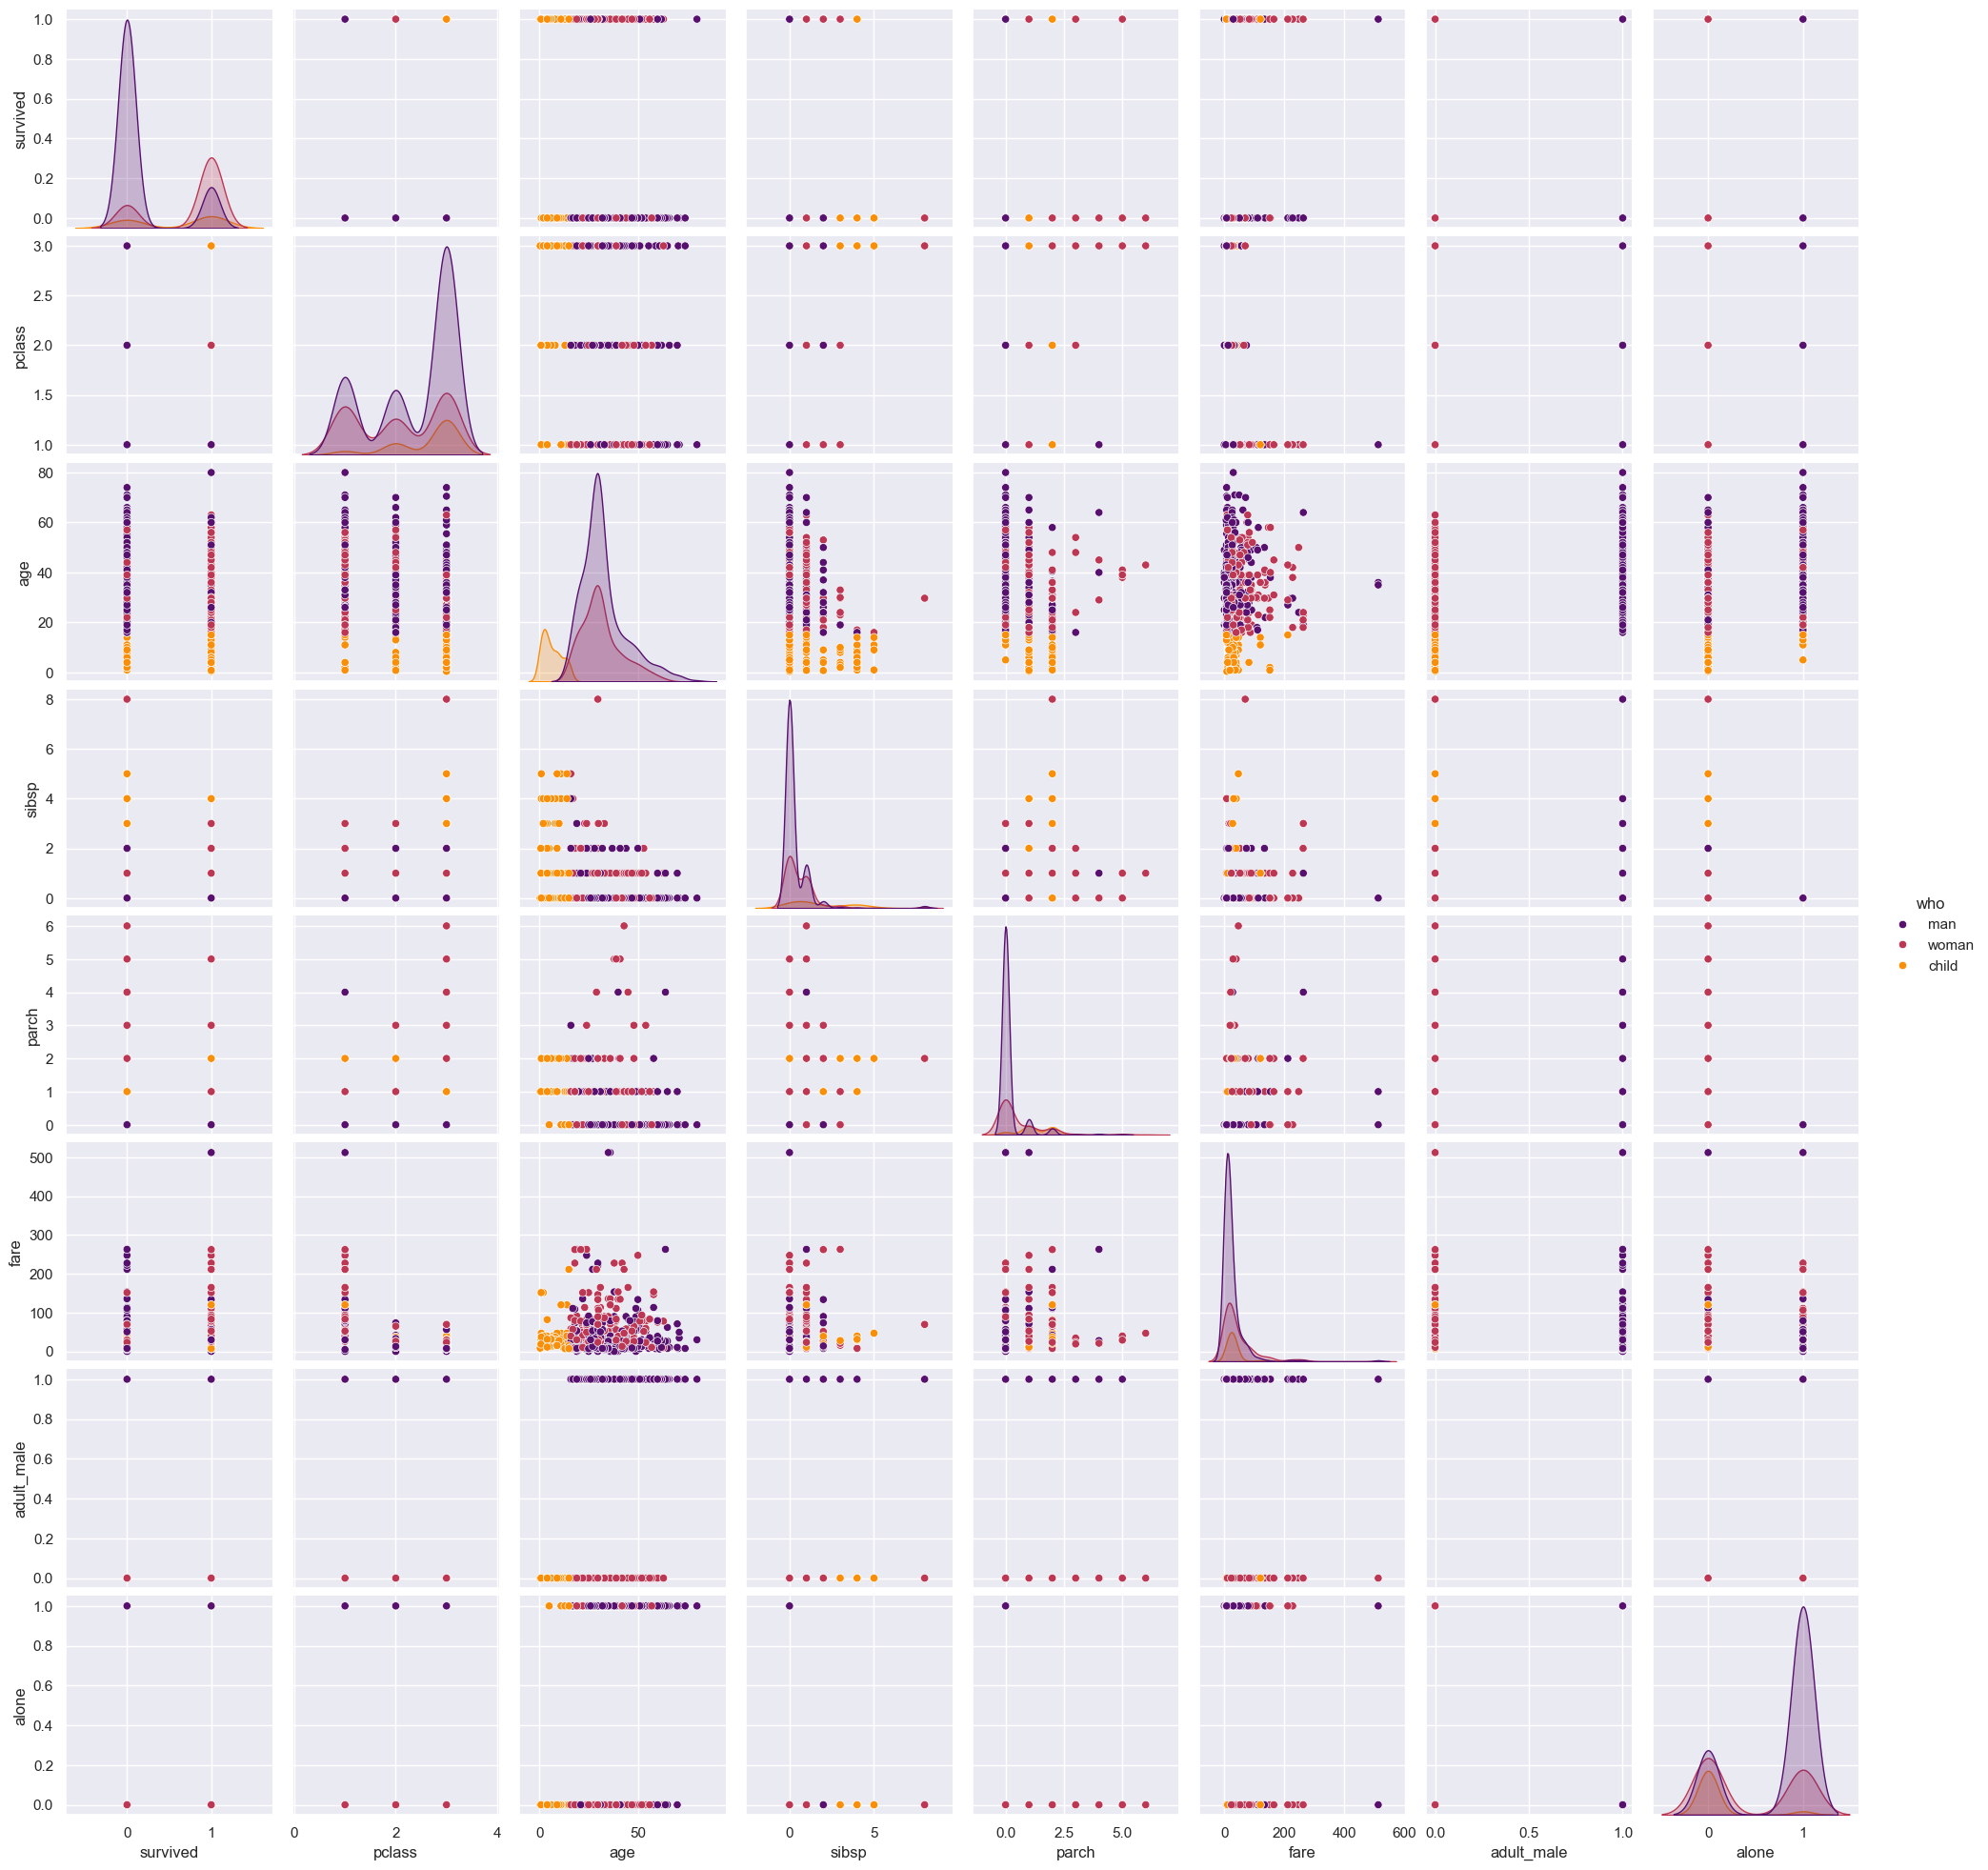

In [289]:
sns.pairplot(data,hue = 'who',palette='inferno')
plt.plot()

### Customized Plotting

[]

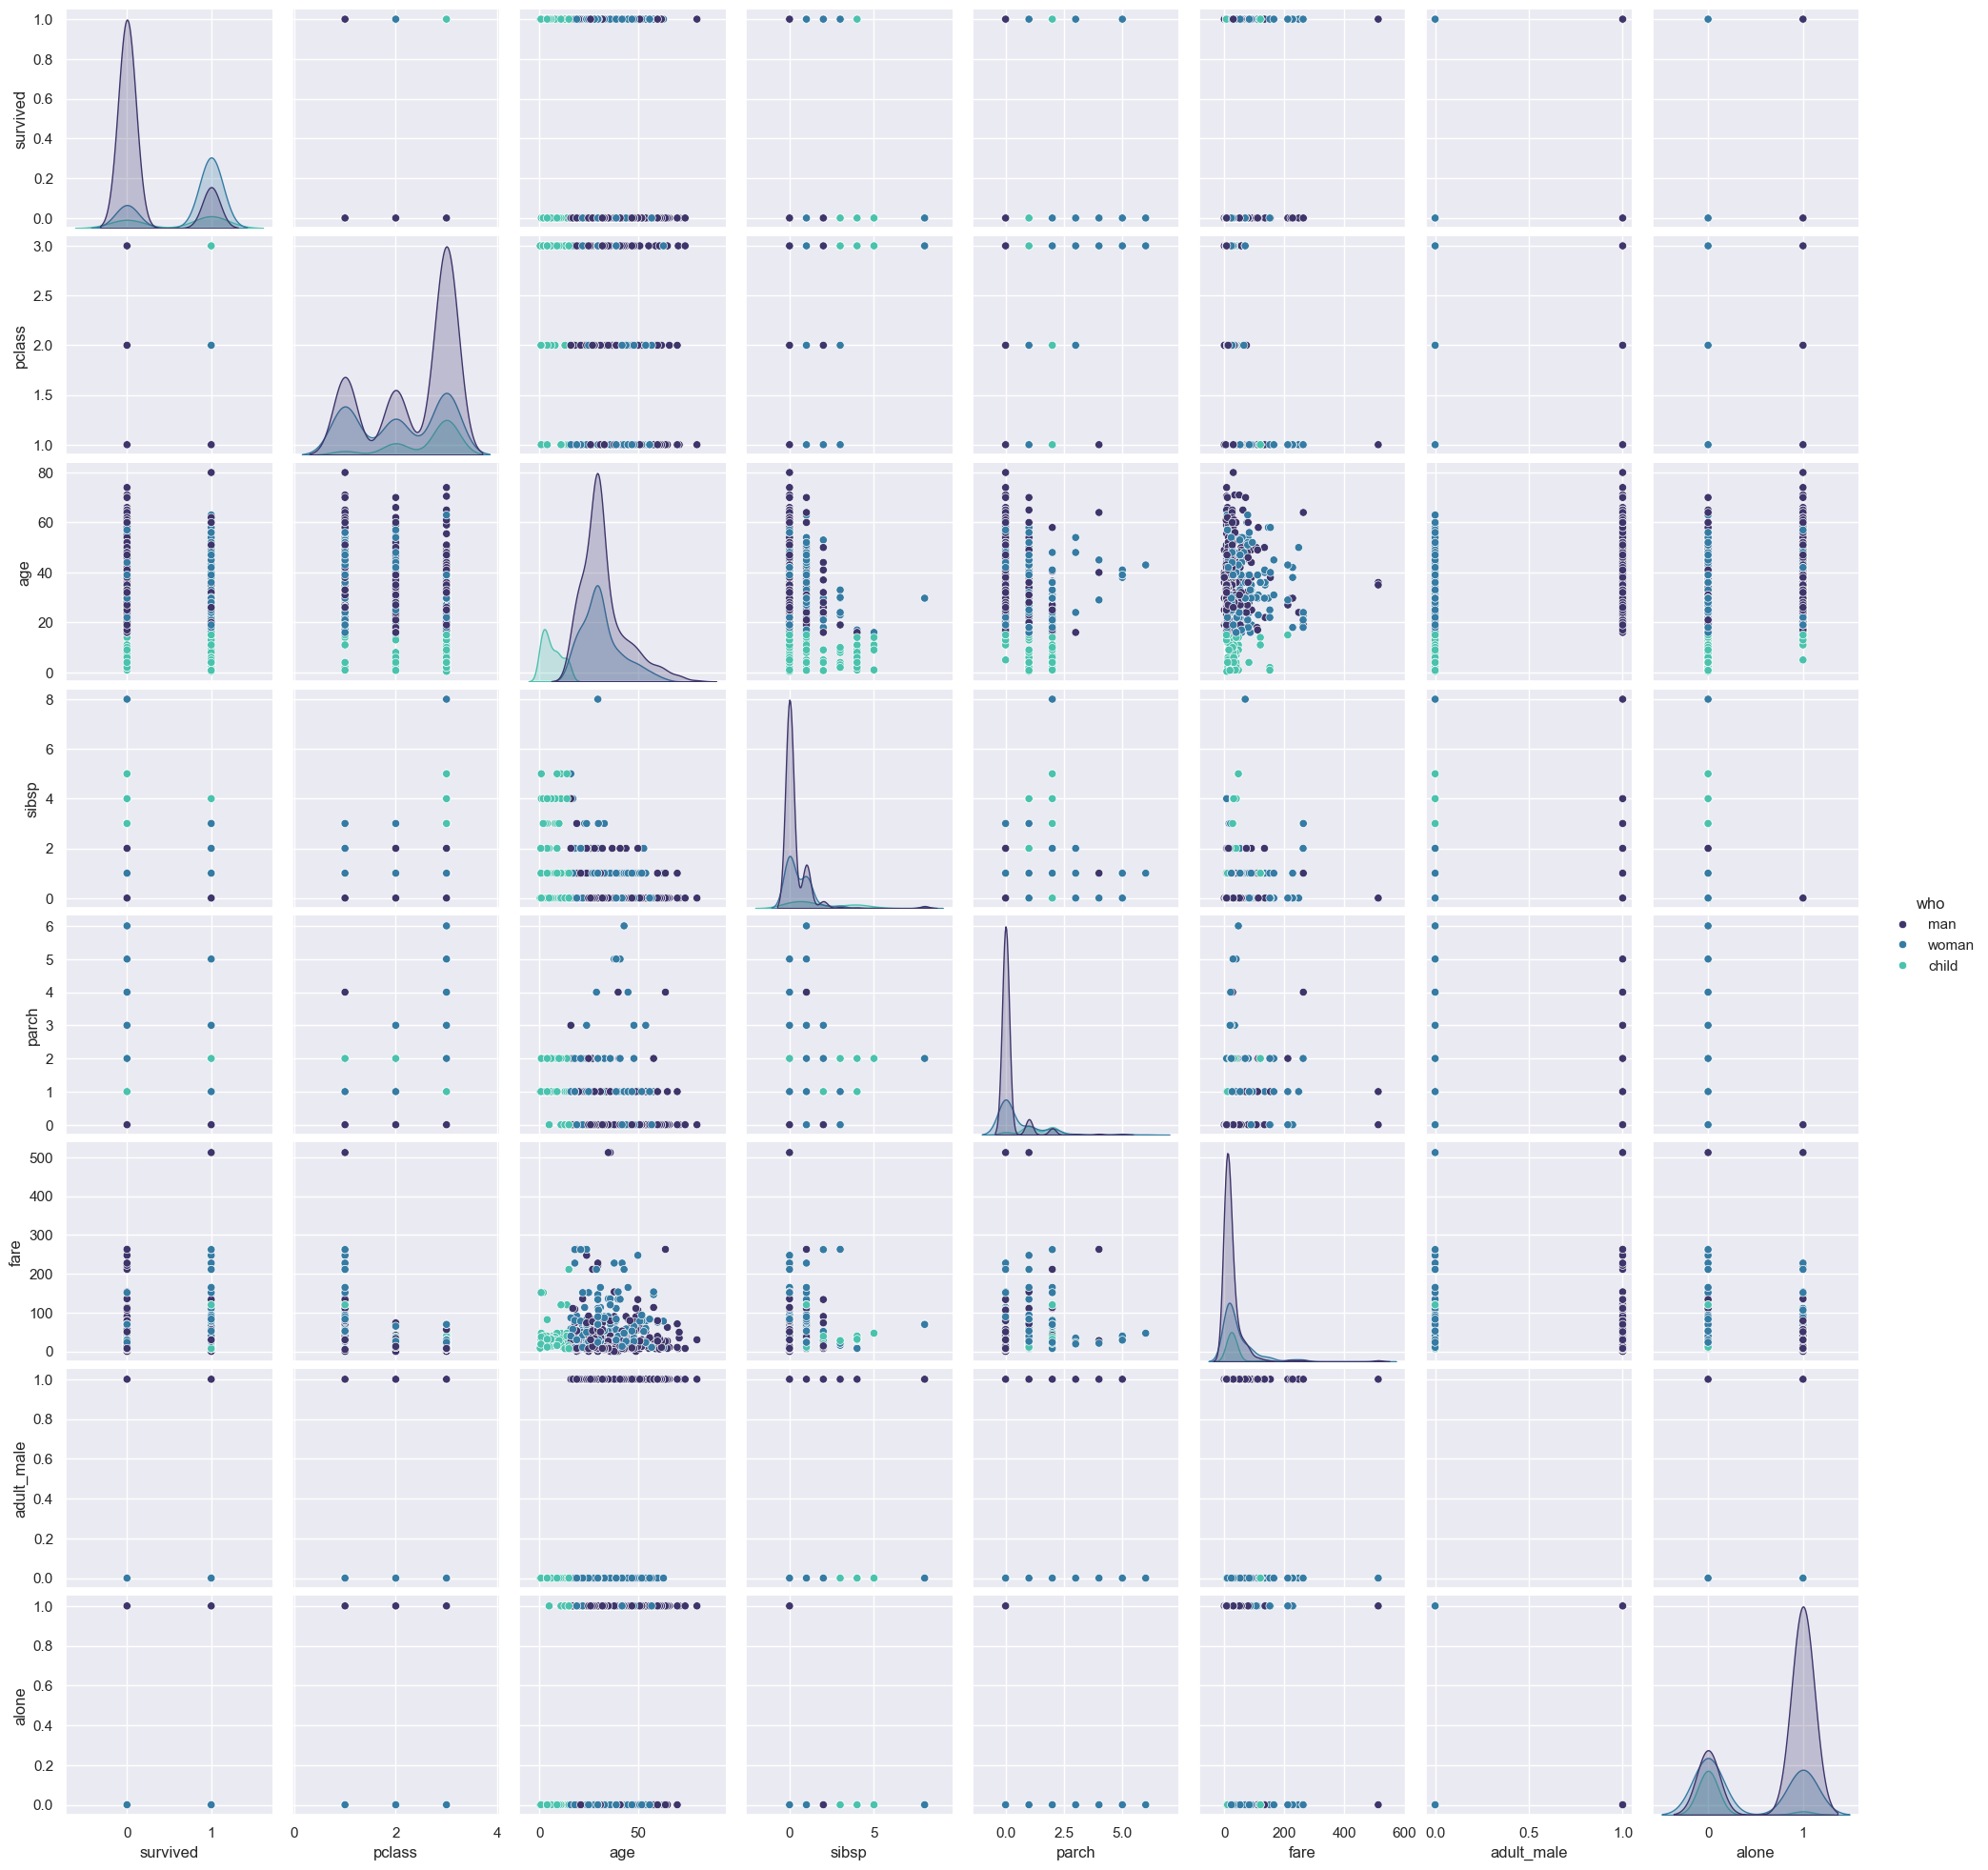

In [300]:
sns.pairplot(data,hue = 'who',palette='mako',kind = 'scatter' , diag_kind='kde') 
plt.plot()